In [1]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
from time import sleep

In [2]:
df = pd.read_csv('csv/auto-mpg.csv')
df
# 전체 데이터의 내용 중 일부분을 출력
# df.head(n) : 데이터프레임의 앞부분, 행수 생략시 기본은 5행 출력
#              데이터의 전체적인 모양, 필드의 구성 확인
# df.tail(n) : 가장 마지막에 추가된 데이터 확인


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
# 함수 기본 값 정의
def buy(count):
    print(f'물건은 {count}개')

In [4]:
buy(5)

물건은 5개


In [5]:
def buy1(count=3): #default 정의
    print(f'물건은 {count}개')

In [6]:
buy1()

물건은 3개


In [7]:
#전체 데이터 수량(크기)
#df.shape : 데이터프레임의 행(데이터수)과 열(컬럼=속성)
#         : 데이터의 수량과 각 데이터들을 몇 개의 특징(속성)으로 구분해서 저장
df.shape

(398, 9)

In [8]:
diff = pd.DataFrame([['int','int64'],
                     ['float','float64'],
                     ['str','object']],
                     columns = ['python','pandas'],
                     index = ['정수','실수','문자열'])
diff

,python,pandas
정수,int,int64
실수,float,float64
문자열,str,object


In [9]:
df.info() # 전체 컬럼별 이름과 컬럼에 저장된 데이터수량과 데이터타입 df.info와는 다름
# horsepower 가 object? 무언가, 정수/실수가 아닌 것이 들어 있다라고 의심해봐야 함.
# 부족한 데이터수량을 갖는 컬럼이 있는가?
# 저장된 데이터 타입에 문제가 있는가?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
a = df.info() # info() 메소드는 반환값이 없는 출력만 목적으로 하는 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
print(a) # info() 메소드는 반환값이 없는 출력만 목적으로 하는 함수

None


In [21]:
len(df.index)

398

In [27]:
# info() 메소드 대신, 데이터수량이나 데이터 타입을 반환하는 함수
count = df.count()
print(count - 398) # 이게 0이라는 것은 누락된 데이터가 없다는 뜻, 필드가 많을때는 이렇게 본다.
print()
print(df.dtypes) # 반환값을 이용하여 코드에 활용하고 싶을때는 info() 대신 count()나 dtype를 사용하면 된다.
# dtypes는 dtypes()가 아니다. 변수 속성은 ()가 안붙고, 함수 속성은 ()가 붙는다. 이건 써봐야 안다.
print('---')
print(df.dtypes == 'object')
print('---')
print((df.dtypes == 'int64')|(df.dtypes == 'float64'))

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
---
mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name         True
dtype: bool
---
mpg              True
cylinders        True
displacement     True
horsepower      False
weight           True
acceleration     True
model year       True
origin           True
car name        False
dtype: bool


In [13]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1        

In [14]:
#기술통계량(평균(mean, 최소값, 중간값(median), 최대값), 표준편차)
df.describe() # 산술데이터만 뽑아서..

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df.mpg.mean()

23.514572864321607

In [28]:
df.mean() # 수치데이터가 아닌 데이터가 포함되어 있어서 에러가 남. 그래서 아래와 같이..

TypeError: Could not convert ['13016515015014019822021522519017016015022595959785884687909511390215200210193889095?1001051008810016517515315018017017511072100888690707665696070958054908616517515015315020815516019097150130140150112768769869297808817515014513715019815015815021522517510510010088954615016717018010088729490851079014523049759111215011012218095?100100678065751001101051401501501401508367785261757575979367951057272170145150148110105110951101101297583100789671979770909588981155386819279831401501201521001058190526070531007811095717075721021508810812018014513015068805896701451101451301101051009818017019014978887589638367789711011048665270601101401391059585881009010585110120145165139140689597759510585971031251151337168115858890110130129138135155142125150716580807712571907070656990115115907660706590889090789075927565105654848676767?676213210088?72848492110845864606765626863656574?7575100748076116120110105888588888885849092?746868637088757067676711085921129684908652847982'
 "chevrolet chevelle malibubuick skylark 320plymouth satelliteamc rebel sstford torinoford galaxie 500chevrolet impalaplymouth fury iiipontiac catalinaamc ambassador dpldodge challenger seplymouth 'cuda 340chevrolet monte carlobuick estate wagon (sw)toyota corona mark iiplymouth dusteramc hornetford maverickdatsun pl510volkswagen 1131 deluxe sedanpeugeot 504audi 100 lssaab 99ebmw 2002amc gremlinford f250chevy c20dodge d200hi 1200ddatsun pl510chevrolet vega 2300toyota coronaford pintoamc gremlinplymouth satellite customchevrolet chevelle malibuford torino 500amc matadorchevrolet impalapontiac catalina broughamford galaxie 500plymouth fury iiidodge monaco (sw)ford country squire (sw)pontiac safari (sw)amc hornet sportabout (sw)chevrolet vega (sw)pontiac firebirdford mustangmercury capri 2000opel 1900peugeot 304fiat 124btoyota corolla 1200datsun 1200volkswagen model 111plymouth crickettoyota corona hardtopdodge colt hardtopvolkswagen type 3chevrolet vegaford pinto runaboutchevrolet impalapontiac catalinaplymouth fury iiiford galaxie 500amc ambassador sstmercury marquisbuick lesabre customoldsmobile delta 88 royalechrysler newport royalmazda rx2 coupeamc matador (sw)chevrolet chevelle concours (sw)ford gran torino (sw)plymouth satellite custom (sw)volvo 145e (sw)volkswagen 411 (sw)peugeot 504 (sw)renault 12 (sw)ford pinto (sw)datsun 510 (sw)toyouta corona mark ii (sw)dodge colt (sw)toyota corolla 1600 (sw)buick century 350amc matadorchevrolet malibuford gran torinododge coronet custommercury marquis broughamchevrolet caprice classicford ltdplymouth fury gran sedanchrysler new yorker broughambuick electra 225 customamc ambassador broughamplymouth valiantchevrolet nova customamc hornetford maverickplymouth dustervolkswagen super beetlechevrolet impalaford countryplymouth custom suburboldsmobile vista cruiseramc gremlintoyota carinachevrolet vegadatsun 610maxda rx3ford pintomercury capri v6fiat 124 sport coupechevrolet monte carlo spontiac grand prixfiat 128opel mantaaudi 100lsvolvo 144eadodge dart customsaab 99letoyota mark iioldsmobile omegaplymouth dusterford maverickamc hornetchevrolet novadatsun b210ford pintotoyota corolla 1200chevrolet vegachevrolet chevelle malibu classicamc matadorplymouth satellite sebringford gran torinobuick century luxus (sw)dodge coronet custom (sw)ford gran torino (sw)amc matador (sw)audi foxvolkswagen dasheropel mantatoyota coronadatsun 710dodge coltfiat 128fiat 124 tchonda civicsubarufiat x1.9plymouth valiant customchevrolet novamercury monarchford maverickpontiac catalinachevrolet bel airplymouth grand furyford ltdbuick centurychevroelt chevelle malibuamc matadorplymouth furybuick skyhawkchevrolet monza 2+2ford mustang iitoyota corollaford pintoamc gremlinpontiac astrotoyota coronavolkswagen dasherdatsun 710ford pintovolkswagen rabbitamc paceraudi 100lspeugeot 504volvo 244dlsaab 99lehonda civic cvccfiat 131opel 1900capri iidodge coltrenault 12tlchevrolet chevelle malibu classicdodge coronet broughamamc matadorford gran torinoplymouth valiantchevrolet novaford maverickamc hornetchevrolet chevettechevrolet woodyvw rabbithonda civicdodge aspen seford granada ghiapontiac ventura sjamc pacer d/lvolkswagen rabbitdatsun b-210toyota corollaford pintovolvo 245plymouth volare premier v8peugeot 504toyota mark iimercedes-benz 280scadillac sevillechevy c10ford f108dodge d100honda accord cvccbuick opel isuzu deluxerenault 5 gtlplymouth arrow gsdatsun f-10 hatchbackchevrolet caprice classicoldsmobile cutlass supremedodge monaco broughammercury cougar broughamchevrolet concoursbuick skylarkplymouth volare customford granadapontiac grand prix ljchevrolet monte carlo landauchrysler cordobaford thunderbirdvolkswagen rabbit custompontiac sunbird coupetoyota corolla liftbackford mustang ii 2+2chevrolet chevettedodge colt m/msubaru dlvolkswagen dasherdatsun 810bmw 320imazda rx-4volkswagen rabbit custom dieselford fiestamazda glc deluxedatsun b210 gxhonda civic cvccoldsmobile cutlass salon broughamdodge diplomatmercury monarch ghiapontiac phoenix ljchevrolet malibuford fairmont (auto)ford fairmont (man)plymouth volareamc concordbuick century specialmercury zephyrdodge aspenamc concord d/lchevrolet monte carlo landaubuick regal sport coupe (turbo)ford futuradodge magnum xechevrolet chevettetoyota coronadatsun 510dodge omnitoyota celica gt liftbackplymouth sapporooldsmobile starfire sxdatsun 200-sxaudi 5000volvo 264glsaab 99glepeugeot 604slvolkswagen sciroccohonda accord lxpontiac lemans v6mercury zephyr 6ford fairmont 4amc concord dl 6dodge aspen 6chevrolet caprice classicford ltd landaumercury grand marquisdodge st. regisbuick estate wagon (sw)ford country squire (sw)chevrolet malibu classic (sw)chrysler lebaron town @ country (sw)vw rabbit custommaxda glc deluxedodge colt hatchback customamc spirit dlmercedes benz 300dcadillac eldoradopeugeot 504oldsmobile cutlass salon broughamplymouth horizonplymouth horizon tc3datsun 210fiat strada custombuick skylark limitedchevrolet citationoldsmobile omega broughampontiac phoenixvw rabbittoyota corolla tercelchevrolet chevettedatsun 310chevrolet citationford fairmontamc concorddodge aspenaudi 4000toyota corona liftbackmazda 626datsun 510 hatchbacktoyota corollamazda glcdodge coltdatsun 210vw rabbit c (diesel)vw dasher (diesel)audi 5000s (diesel)mercedes-benz 240dhonda civic 1500 glrenault lecar deluxesubaru dlvokswagen rabbitdatsun 280-zxmazda rx-7 gstriumph tr7 coupeford mustang cobrahonda accordplymouth reliantbuick skylarkdodge aries wagon (sw)chevrolet citationplymouth relianttoyota starletplymouth champhonda civic 1300subarudatsun 210 mpgtoyota tercelmazda glc 4plymouth horizon 4ford escort 4wford escort 2hvolkswagen jettarenault 18ihonda preludetoyota corolladatsun 200sxmazda 626peugeot 505s turbo dieselvolvo dieseltoyota cressidadatsun 810 maximabuick centuryoldsmobile cutlass lsford granada glchrysler lebaron salonchevrolet cavalierchevrolet cavalier wagonchevrolet cavalier 2-doorpontiac j2000 se hatchbackdodge aries sepontiac phoenixford fairmont futuraamc concord dlvolkswagen rabbit lmazda glc custom lmazda glc customplymouth horizon misermercury lynx lnissan stanza xehonda accordtoyota corollahonda civichonda civic (auto)datsun 310 gxbuick century limitedoldsmobile cutlass ciera (diesel)chrysler lebaron medallionford granada ltoyota celica gtdodge charger 2.2chevrolet camaroford mustang glvw pickupdodge rampageford rangerchevy s-10"] to numeric

In [30]:
df[['mpg','cylinders','weight','acceleration']].mean()

mpg               23.514573
cylinders          5.454774
weight          2970.424623
acceleration      15.568090
dtype: float64

In [17]:
#df.min()
#df.median()
#df.max()

columns = ['mpg','cylinders','weight','acceleration']
min = df[columns].min()
med = df[columns].median()
max = df[columns].max()

In [18]:
min,med,max

(mpg                9.0
 cylinders          3.0
 weight          1613.0
 acceleration       8.0
 dtype: float64,
 mpg               23.0
 cylinders          4.0
 weight          2803.5
 acceleration      15.5
 dtype: float64,
 mpg               46.6
 cylinders          8.0
 weight          5140.0
 acceleration      24.8
 dtype: float64)

In [19]:
pd.DataFrame({'min':min,'med':med,'max':max})

,min,med,max
mpg,9.0,23.0,46.6
cylinders,3.0,4.0,8.0
weight,1613.0,2803.5,5140.0
acceleration,8.0,15.5,24.8


In [20]:
pd.DataFrame({'min':min,'med':med,'max':max}).T

,mpg,cylinders,weight,acceleration
min,9.0,3.0,1613.0,8.0
med,23.0,4.0,2803.5,15.5
max,46.6,8.0,5140.0,24.8


In [33]:
df[['mpg','displacement','weight']].corr()

,mpg,displacement,weight
mpg,1.000000,-0.804203,-0.831741
displacement,-0.804203,1.000000,0.932824
weight,-0.831741,0.932824,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

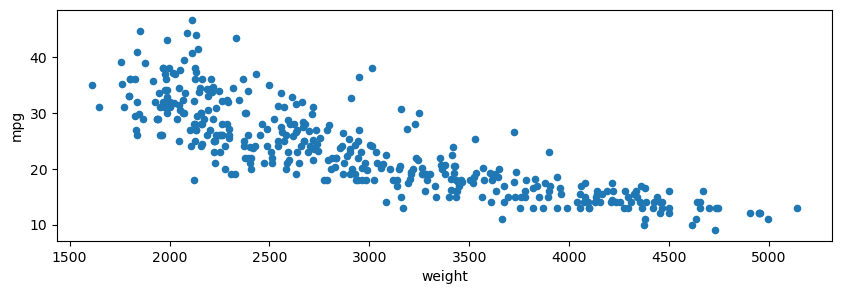

In [35]:
df[['mpg','weight']].plot(x = 'weight', y = 'mpg', kind = 'scatter',figsize = (10,3))

In [36]:
#Series.plot(kind = '그래프종류')
#DataFrame.plot(kind = '그래프종류')

In [68]:
df = pd.read_excel('excel/남북한_발전전력량.xlsx')
df1 = df.sort_index(ascending = False)
df1

,남북한별,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7,NaN,대체에너지,-,-,-,-,-,-,-,-,...,118,151,173,196,243,281,313,311,391,473
6,NaN,원자력,529,563,565,581,587,670,739,771,...,1388,1564,1648,1620,1484,1335,1459,1602,1580,1761
5,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,3581,3427,3402,3522,3738,4018,3774,3466,3702,3618
4,NaN,수력,64,51,49,60,41,55,52,54,...,84,78,58,66,70,73,62,71,67,73
3,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944
2,NaN,화력,121,113,105,88,93,88,88,86,...,82,86,90,111,116,121,128,112,94,98
1,NaN,수력,156,150,142,133,138,142,125,107,...,139,130,100,128,119,128,110,128,161,166
0,북한,합계,277,263,247,221,231,230,213,193,...,221,216,190,239,235,249,238,239,255,264


In [70]:
df1.iloc[[4,7]]

,남북한별,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944
0,북한,합계,277,263,247,221,231,230,213,193,...,221,216,190,239,235,249,238,239,255,264


In [67]:
df2 = df.loc[[0,3]]
#df.iloc([[4,7]])
df2.drop('발전 전력별',axis = 'columns',inplace = True)
df2.set_index('남북한별',inplace = True)
df2.index = ['north','south']
df2

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
north,277,263,247,221,231,230,213,193,170,186,...,221,216,190,239,235,249,238,239,255,264
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944


In [71]:
df

,남북한별,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,북한,합계,277,263,247,221,231,230,213,193,...,221,216,190,239,235,249,238,239,255,264
1,NaN,수력,156,150,142,133,138,142,125,107,...,139,130,100,128,119,128,110,128,161,166
2,NaN,화력,121,113,105,88,93,88,88,86,...,82,86,90,111,116,121,128,112,94,98
3,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944
4,NaN,수력,64,51,49,60,41,55,52,54,...,84,78,58,66,70,73,62,71,67,73
5,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,3581,3427,3402,3522,3738,4018,3774,3466,3702,3618
6,NaN,원자력,529,563,565,581,587,670,739,771,...,1388,1564,1648,1620,1484,1335,1459,1602,1580,1761
7,NaN,대체에너지,-,-,-,-,-,-,-,-,...,118,151,173,196,243,281,313,311,391,473


In [129]:
df['남북한별']= df['남북한별'].ffill()
df3 = df.set_index(['남북한별','발전 전력별'])
df3
df3 = df3.loc[[('북한','합계'),('남한','합계')]]
df3
df3.index = ['north','south']
df3.dtypes
df3.T['north'].map(int)
df3.columns
df3.columns = df3.columns.map(int)
df3.columns

#for문을 안쓰면,
#df3[`1990'] = df3[`1990'].map(int)
#df3[`1991'] = df3[`1991'].map(int)
#df3[`1992'] = df3[`1992'].map(int)
# ....  이렇게 해야 하는데,

# for문을 쓰면,
for year in df3.columns:
    df3[year] = df3[year].map(int)
    
df3
df3.dtypes[:5]

1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
dtype: object

<Axes: >

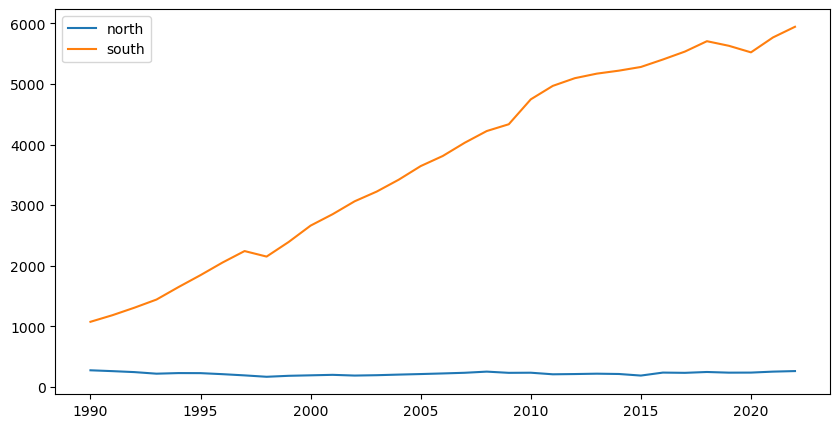

In [131]:
# 기본은 선 그래프,
# index축 : X축
# columns축 : 범례(legend)
# 수량 : y축
# 그래프 크기 : figsize = (행크기, 열크기)
df3_T = df3.transpose()
df3_T.plot(figsize = (10,5))

<Axes: >

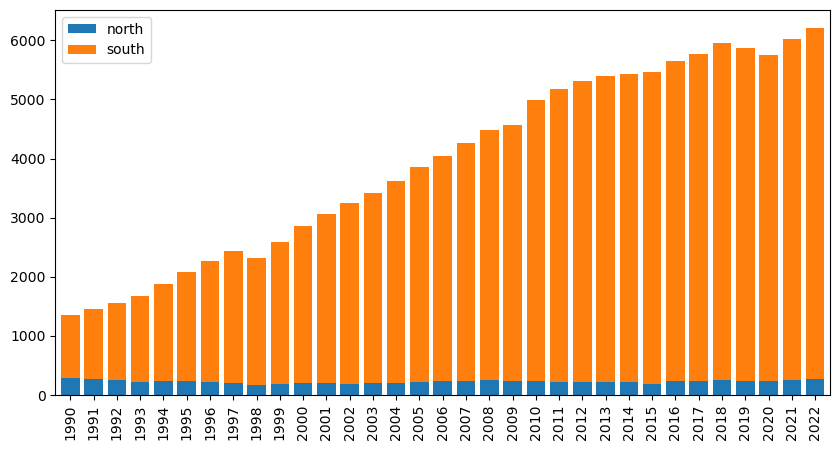

In [137]:
#df.plot(kind = 'bar') : 수직막대그래프
# width option = 굵기
# stacked = False/True

#df3_T.plot(kind = 'bar', figsize = (10,5), width = 0.8)
df3_T.plot(kind = 'bar', figsize = (10,5), width = 0.8, stacked = True)

In [89]:
# 숫자로 바꾸기
df3

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
north,277,263,247,221,231,230,213,193,170,186,...,221,216,190,239,235,249,238,239,255,264
south,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944


In [108]:
# a를 숫자로 바꾸는 법 -> 3가지 방법

a = ['80','70','50','68','93']
#1번째
a2 = []
for i in a:
    a2.append(int(i))
a2

[80, 70, 50, 68, 93]

In [111]:
#2번째
a3 = [int(a) for a in a] # list 내포 사용하기
a3

[80, 70, 50, 68, 93]

함수지향
 함수(데이터)  -> 처리결과
 map(함수,목록)

객체지향
 데이터.함수()  -> 처리결과
 목록.map(함수)

In [114]:
#3번째
print(list(map(int, a))) #함수지향

[80, 70, 50, 68, 93]


In [142]:
df

,남북한별,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,북한,합계,277,263,247,221,231,230,213,193,...,221,216,190,239,235,249,238,239,255,264
1,북한,수력,156,150,142,133,138,142,125,107,...,139,130,100,128,119,128,110,128,161,166
2,북한,화력,121,113,105,88,93,88,88,86,...,82,86,90,111,116,121,128,112,94,98
3,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,5171,5220,5281,5404,5535,5706,5630,5522,5768,5944
4,남한,수력,64,51,49,60,41,55,52,54,...,84,78,58,66,70,73,62,71,67,73
5,남한,화력,484,573,696,803,1022,1122,1264,1420,...,3581,3427,3402,3522,3738,4018,3774,3466,3702,3618
6,남한,원자력,529,563,565,581,587,670,739,771,...,1388,1564,1648,1620,1484,1335,1459,1602,1580,1761
7,남한,대체에너지,-,-,-,-,-,-,-,-,...,118,151,173,196,243,281,313,311,391,473


In [150]:
df4 = df.loc[[3,4,5,6,7],:]

In [149]:
df4 = df.set_index(['남북한별','발전 전력별'])
df4
df4.loc['남한']

KeyError: '남한'

In [158]:
df4 = df4.replace({'-':0})
df4.dtypes
df4_T = df4.T
df4_T.plot(kind = 'bar',figsize = (10,5), width=0.7)

TypeError: no numeric data to plot

In [160]:
df4_T.dtypes

3    object
4    object
5    object
6    object
7    object
dtype: object